<div style="text-align:center">
    <h1>
        On-policy Monte Carlo Control
    </h1>
</div>
<br>

<div style="text-align:center">
    <p>
        In this notebook we are going to implement one of the two major strategies that exist when learning a policy by interacting with the environment, called on-policy learning. The agent will perform the task from start to finish and based on the sample experience generated, update its estimates of the q-values of each state-action pair Q(s,a).
    </p>
</div>


<br>

## Import the necessary software libraries:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from envs import Maze
from utils import plot_policy, plot_action_values, test_agent

/usr/local/lib/python3.11/dist-packages/pygame/pkgdata.py:25: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import resource_stream, resource_exists
/usr/local/lib/python3.11/dist-packages/pkg_resources/__init__.py:3154: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)
/usr/local/lib/python3.11/dist-packages/pkg_resources/__init__.py:3154: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google.cloud')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-pa

## Initialize the environment

In [ ]:
env = Maze()

/usr/local/lib/python3.11/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


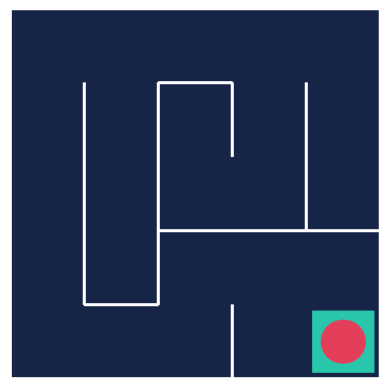

In [ ]:
frame = env.render(mode='rgb_array')
plt.axis('off')
plt.imshow(frame)

In [ ]:
print(f"Observation space shape: {env.observation_space.nvec}")
print(f"Number of actions: {env.action_space.n}")

Observation space shape: [5 5]
Number of actions: 4


## Define value table $Q(s, a)$

#### Create the $Q(s, a)$ table

In [ ]:
action_values = np.zeros(shape=(5, 5, 4))

#### Plot Q(s, a)

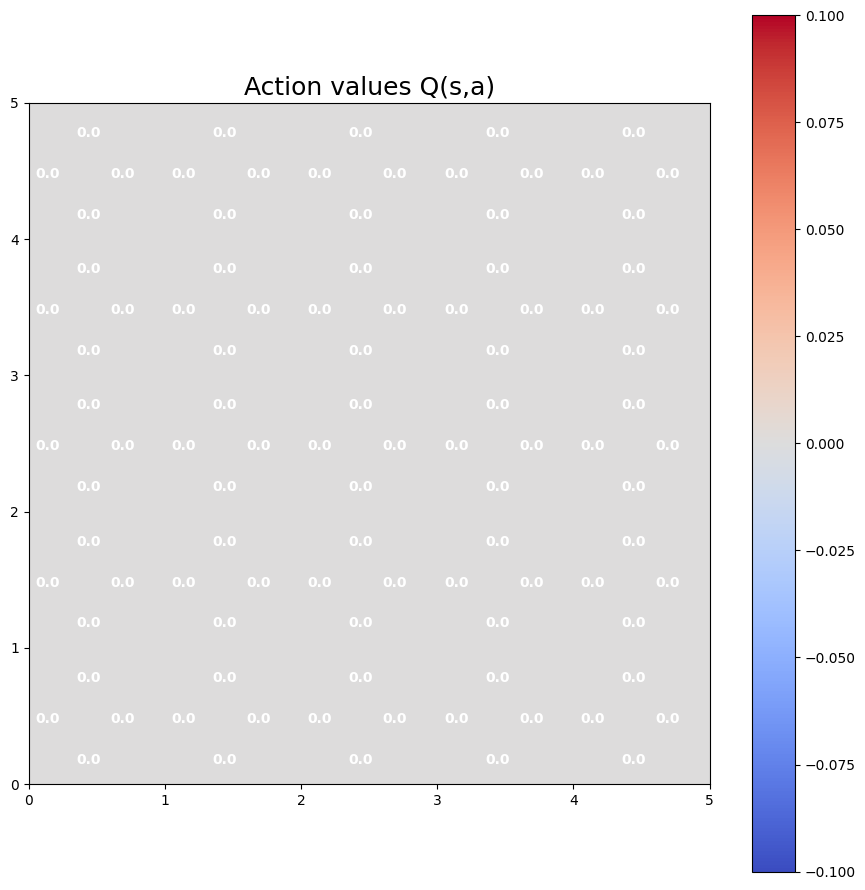

In [ ]:
plot_action_values(action_values)

## Define the policy $\pi(s)$

#### Create the policy $\pi(s)$

In [ ]:
def policy(state, epsilon=0.):
    if np.random.random() < epsilon:
        return np.random.randint(4)
    else:
        av = action_values[state]
        return np.random.choice(np.flatnonzero(av == av.max()))

#### Test the policy with state (0, 0)

In [ ]:
action = policy((0,0),0.2)
print(f"Action taken in state (0,0): {action}")

Action taken in state (0,0): 1


#### Plot the policy

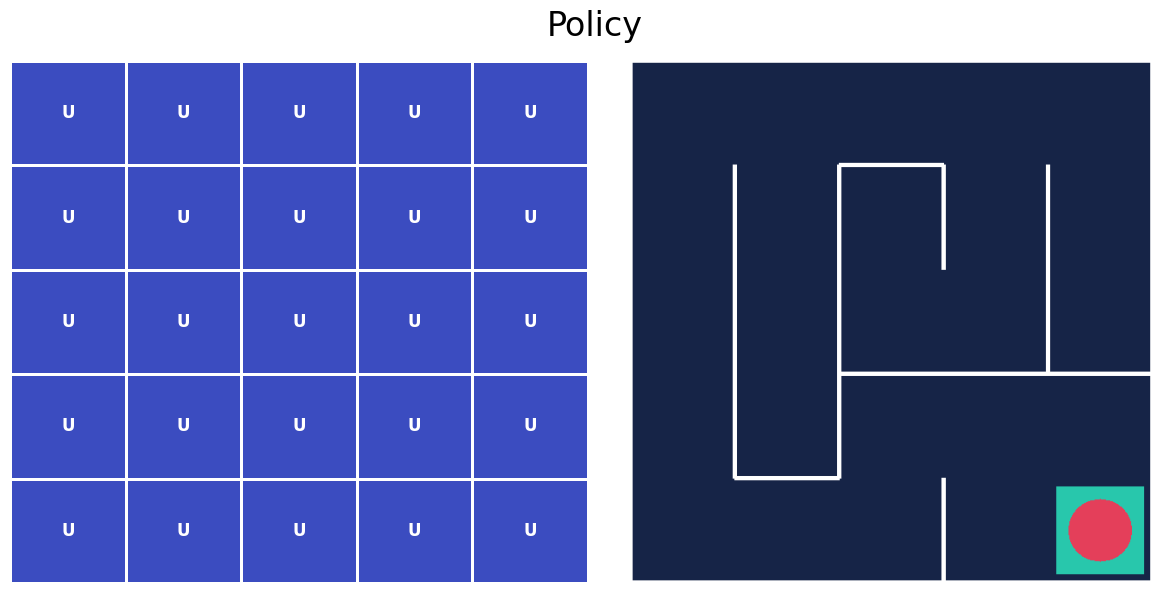

In [ ]:
plot_policy(action_values, frame)

## Implement the algorithm

</br>

In [ ]:
def on_policy_mc_control(policy, action_values, episodes, gamma=0.99, epsilon=0.2):

    sa_returns = {}

    for episode in range(1, episodes+1):
        state = env.reset()
        done = False
        transitions = []

        while not done:
            action = policy(state, epsilon)
            next_state, reward, done, _ = env.step(action)
            transitions.append([state, action, reward])
            state = next_state

        G = 0
        for state_t, action_t, reward_t in reversed(transitions):
            G = reward_t + gamma * G

            if not (state_t, action_t) in sa_returns:
                sa_returns[(state_t, action_t)] = []
            sa_returns[(state_t, action_t)].append(G)
            action_values[state_t][action_t] = np.mean(sa_returns[(state_t, action_t)])

In [ ]:
on_policy_mc_control(policy, action_values, episodes=1000)

## Show results

#### Show resulting value table $Q(s, a)$

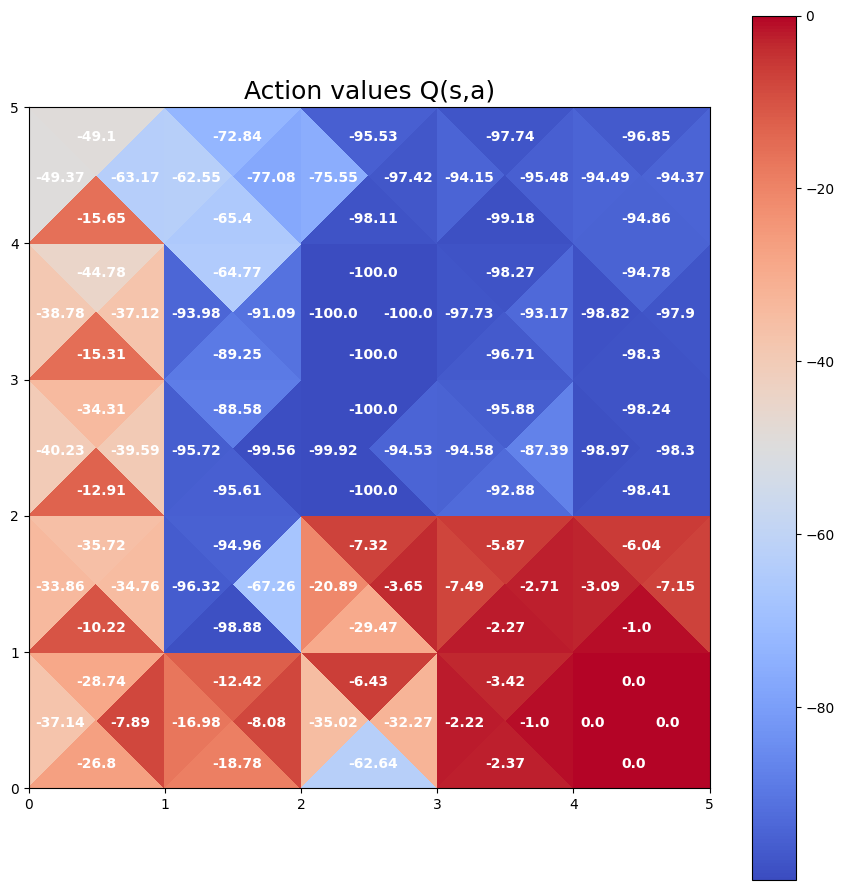

In [ ]:
plot_action_values(action_values)

#### Show resulting policy $\pi(\cdot|s)$

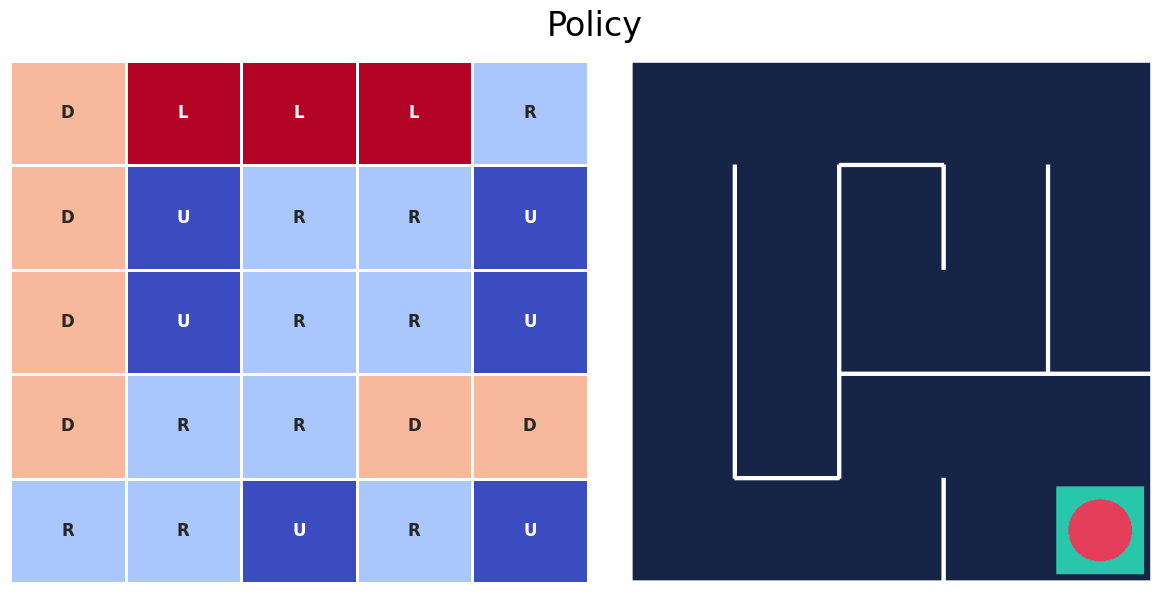

In [ ]:
plot_policy(action_values, frame)

#### Test the resulting agent

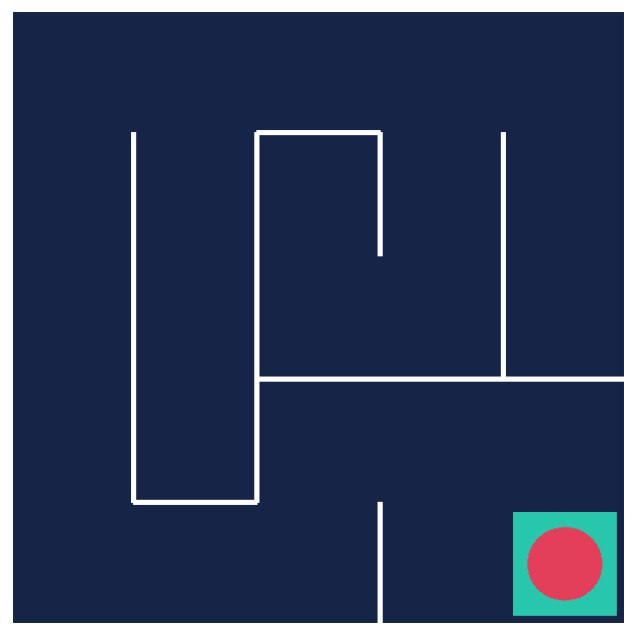

In [ ]:
test_agent(env, policy, episodes=5)

## Resources

[[1] Reinforcement Learning: An Introduction. Ch. 4: Dynamic Programming](https://web.stanford.edu/class/psych209/Readings/SuttonBartoIPRLBook2ndEd.pdf)

In [ ]:
def sarsa(action_values, policy, episodes, alpha=0.1, gamma=0.99, epsilon=0.2):
    for episode in range(1, episodes + 1):
        state = env.reset()
        action = policy(state, epsilon)
        done = False
        while not done:
            next_state, reward, done, _ = env.step(action)
            next_action = policy(next_state, epsilon)
            qsa = action_values[state][action]
            next_qsa = action_values[next_state][next_action]
            action_values[state][action] = qsa + alpha * (reward + gamma * next_qsa - qsa)
            state = next_state
            action = next_action